# Introduction

We will now discuss about Transformers'**Attention Mechanism**, used as a basic model for GPT and BERT. It's important to understand state-of-the-art language models. We will go though an excercise French-English translation of a pioece of text.

<a class="anchor" id="0.1"></a>
#  💥 Table of Contents
i.  [How do I translate the sentence by machine? : Appearance of Attention Mechanism](#1)

ii.  [What is Attention's idea?](#2)

iii.  [Attention's process](#3)

   - [Find the attention score](#3.1)
   - [Attention distribution is obtained through the softmax function](#3.2)
   - [Attention Value is obtained by weighting the attention weights and the hidden state of each encoder](#3.3)
   - [Concatenate : connects the attention value with the hidden state at time t of the decoder](#3.4)
   - [Calculating  **𝑠̃** the input to output layer operation](#3.5)
   - [Use **𝑠̃** as the input for the output layer](#3.6)


iv. [seq2seq with attention vs traditional seq2seq](#4)


v. [Different types of attention](#5)


vi. [Additional Concepts : Teacher Forcing](#6)


vii. [French-English Machine Translation Tutorial: Using Pytorch](#7)


viii. [conclusion](#17)


ix. [References](#18) 


# 1. How do I translate the sentence by machine? : Appearance of Attention Mechanism <a class="anchor" id="1"></a>

The seq2seq model compresses the input sequence into one fixed-size vector representation, called the context vector, through which the decoder produces the output sequence. Through this, each word can be translated.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FprTT1%2FbtqChF6Z2BM%2FyKmITHEga1J0ZYFWEMr8Y0%2Fimg.png"/ width="500" height="500" ></center>

$\;\;\;\;\;\;\;\;$

Let's take a look at the seq2seq model using RNN. "I" comes first, "love" comes next, and "you" comes next. Consequently, the final RNN cell states "I love you". This vector is called the **context vector**.

**Encoder** eventually creates a context vector by receiving each word sequentially. **Decoder** starts machine translation from this context vector. From start to end, the words in it are translated immediately.

However, there are two main problems with seq2seq models based on these RNNs.

   1. **trying to compress all the information into one fixed-size vector results in information loss.** 
   2. **there exists the Vanishing Gradient problem, which is a chronic problem of RNN.**

In other words, in the field of machine translation, if the input sentence is long, the translation quality is poor. Attention helps in this case.

# 2. What is Attention's idea? <a class="anchor" id="2"></a>

The basic idea of Attention is that at every time step that the decoder predicts output words, it references the entire input sentence from the encoder. However, instead of referring to all the input sentences at the same rate, you will focus more on the parts of the input words that are related to the words you need to predict at that point.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FYzQNQ%2FbtqCe5rLdtM%2FKuUvWxOTdTLlOte7lVm4i1%2Fimg.png"/ width="500" height="500" ></center>

$\;\;\;\;\;\;\;\;$

In other words, each state from the encoder, each RNN cell, is utilized. We can summarize the advantages of Attention in two ways here.

   1. **It is not a fixed size context vector. The problem that comes from one fixed-size context vector is to refresh the context vector for each state.** 
   2. **Of all the states in Encoder, we can design a mechanism that can only focus on the words we need to focus on.**


# 3. Attention's process <a class="anchor" id="3"></a>

OK! If you have a rough idea of Attention, let's look at the Attention process. There are many different types of Attention, and let's understand it through Dot-Product Attention, which is the most informally easy to understand formula. Among the attractions used in seq2seq, the difference between dot-product attention and other attention is largely the difference in intermediate formulas, and the mechanism itself is almost similar. I'll explain it again after various Attentions.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://wikidocs.net/images/page/22893/dotproductattention1_final.PNG"/ width="500" height="500" ></center>

$\;\;\;\;\;\;\;\;$

The third LSTM cell in the decoder shows the use of an attention mechanism when predicting output words. Suppose that the first and second LSTM cells in the decoder have already gone through the attention mechanism to predict je and suis. Before explaining the attention mechanism in detail, let's first get a sense of the overall picture above. The third LSTM cell in the decoder wants to refer to the information of all the input words in the encoder once again to predict the output words. The description of the intermediate process is currently omitted, and what is noteworthy here is the softmax function of the encoder.

The resulting value of the softmax function is a numerical value of how helpful each of the words I, am, a, and student is when predicting the output word. The figure above shows the magnitude of the resultant value of the softmax function in the size of a red rectangle. The larger the rectangle, the larger the helpful it is. When each input word is quantified and measured to help you predict the decoder, it is sent to the decoder with one piece of information. In the figure above, the green triangle corresponds to this. As a result, the decoder is more likely to predict output words more accurately. Now that we have a holistic sense of the attention mechanism.

Let's look at the following as an easier example.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FG1u0d%2FbtqCl9U65jT%2F3w2vCPrTIRU0a14bWNooo1%2Fimg.png"/ width="400" height="400" ></center>

$\;\;\;\;\;\;\;\;$

First of all, there is a **Fully connected network (FC)**. We utilize $h_1$, $h_2$, ... $h_N$ (the states of all RNN cells from the encoder). And I put in the final H3. Because there is no value from the decoder under the current circumstances, we simply put in the state value that existed before. Output values from the fully connected network are $s_1$, $s_2$, and $s_3$, the scores on the RNN cell in each encoder.

Now that we have a holistic sense of the attention mechanism, let's take a closer look at the attention mechanism.


### 1. Find the attention score <a class="anchor" id="3.1"></a>

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://wikidocs.net/images/page/22893/dotproductattention2_final.PNG"/ width="500" height="500" ></center>

$\;\;\;\;\;\;\;\;$

If the time step of the encoder is 1, 2, and N respectively, then the hidden state of time step of the encoder is  $h_1$, $h_2$, ... $h_N$ respectively. Let the decoder's hidden state at the time step t of the decoder be S. We also assume here that the hidden state of the encoder and the hidden state of the decoder are the same dimensions. For the above figure, the encoder's hidden state and the decoder's hidden state are the same dimension 4.

The attention mechanism requires a new value called Attention Value for output word prediction. Let's define the attention value to predict the t-th word as $a_t$.

An attention score is a score value that determines how similar each of the hidden states of the encoder is to the hidden state $s_t$ of the decoder at this point in time to predict the word at point t of the current decoder.

Dot-Product Attention will transpose $s_t$, perform each hidden state and dot product to obtain the value of this score. That is, all attention score values are scalar. For example, the method of calculating the attention score of $s_t$ and the ith hidden state of the encoder is shown below.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://wikidocs.net/images/page/22893/i%EB%B2%88%EC%A7%B8%EC%96%B4%ED%85%90%EC%85%98%EC%8A%A4%EC%BD%94%EC%96%B4_final.PNG"/ width="300" height="300" ></center>

$\;\;\;\;\;\;\;\;$

Define the attention score function as follows :

$$
\operatorname{score}(s_i, h_i) = s_{t}^Th_{i}
$$

Let's define the collection value of all hidden attention scores of $s_t$, and encoder as $e^t$. The formula for $e^t$ is as follows.

$$
\operatorname{e^t} = [s_{t}^Th_{1}, \operatorname{...}, s_{t}^Th_{N}]
$$



### 2. Attention distribution is obtained through the softmax function <a class="anchor" id="3.2"></a>

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://wikidocs.net/images/page/22893/dotproductattention3_final.PNG"/ width="500" height="500" ></center>

$\;\;\;\;\;\;\;\;$

By applying the softmax function to $e^t$, you obtain a probability distribution that adds all values to 1. This is known as the Attention Distribution, and each value is known as the Attention Weight. In addition, the size of the attention weights in the hidden state of each encoder was visualized through the size of the rectangle. That is, the greater the attention weight, the larger the rectangle.

Let me look at an easier example.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdnaBKf%2FbtqCsIuHK8B%2FGKHuV1AgOI9e8bKt90kFp0%2Fimg.png"/ width="400" height="400" ></center>

$\;\;\;\;\;\;\;\;$

The above figure shows the probability value of taking the softmax value of "I love you". 90% for "I", 0% for "love", and 10% for "you". This is called Attention weight and these values indicate how much we will focus.

When the attention distribution, which is a collection of attention weights at point t of the decoder, is called $a^t$, defining $a^t$ as an expression :

$$
a_t = \text{softmax}(e^t)
$$




### 3. Attention Value is obtained by weighting the attention weights and the hidden state of each encoder <a class="anchor" id="3.3"></a>

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://wikidocs.net/images/page/22893/dotproductattention4_final.PNG"/ width="500" height="500" ></center>

$\;\;\;\;\;\;\;\;$

Now it's time to combine the information we've prepared so far into one. To obtain the final result of the attention, we multiply the hidden state of each encoder and the attention weights, and finally add them all. In summary, you might say weighed Sum. Below is the final result of the attention, i.e., an expression for the attention value $a_t$, the output of the attention function.

$$
a_t = \sum_{i=1}^{N} a_{i}^{t}h_i
$$

The attention value $a_t$ is also called the **context vector** because it often contains the context of the encoder.

Let me give you an easy example.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbCGz9v%2FbtqCqNjebAu%2F77pnvKbjaNeIrPj3yM0MQ0%2Fimg.png"/ width="400" height="400" ></center>

$\;\;\;\;\;\;\;\;$

cv1 stands for context vector1. **cv1 = $h_1$ * 0.9 + $h_2$ * 0 + $h_3$ * 0.1.** In other words, the first context vector is I for 90% and you for 10%.



### 4. Concatenate : connects the attention value with the hidden state at time t of the decoder <a class="anchor" id="3.4"></a>

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://wikidocs.net/images/page/22893/dotproductattention5_final_final.PNG"/ width="500" height="500" ></center>

$\;\;\;\;\;\;\;\;$

You have now obtained the final value of the attention function, the attention value $a_t$. Earlier, we introduced the following expression as an expression to determine the hidden state at point t with the attention mechanism: In fact, when the attention value is obtained, the attention mechanism concatenates $a_t$ with $s_t$ to form a vector. Let's define this as $v_t$. By using this $v_t$ as the input for the $\hat{y}$ prediction operation, we can leverage the information from the encoder to better predict $\hat{y}$. **This is at the heart of the attention mechanism.**

Let's take another easy example.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCpNnB%2FbtqCrPOozvr%2FEXUeB68QIoA2ucSkvW5K0K%2Fimg.png"/ width="400" height="400" ></center>

$\;\;\;\;\;\;\;\;$

In the picture above, the output 'Nan' is shown. What will the second word come from? The second word is that the current state value in the decoder goes into FC. **What we need to note is that $h_1$, $h_2$, and $h_3$ are always used.**



### 5. Calculating 𝑠̃ the input to output layer operation <a class="anchor" id="3.5"></a>

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://wikidocs.net/images/page/22893/st.PNG"/ width="500" height="500" ></center>

$\;\;\;\;\;\;\;\;$

In the paper, we added another neural network operation before sending $v_t$ directly to the output layer. Multiply with the weight matrix and pass through the hyperbolic tangent function to obtain $\hat{s}_t$, a new vector for output layer operations. In seq2seq, which does not use the attention mechanism, the input of the output layer is $s_t$ hidden at point t, while in the attention mechanism, the input of the output layer is $\hat{s}_t$.

Expressing this as an expression: In expressions, $W_c$ is the learnable weight matrix, and $b_c$ is the bias. Deflection is omitted in the figure.

$$
\tilde{s}_{t} = \tanh(\mathbf{W_{c}}[{a}_t;{s}_t] + b_{c})
$$



### 6. Use 𝑠̃ as the input for the output layer <a class="anchor" id="3.6"></a>

Use $\hat{s}_t$ as the input to the output layer to obtain the prediction vector.

$$
\widehat{y}_t = \text{Softmax}\left( W_y\tilde{s}_t + b_y \right)
$$

# 4. seq2seq with attention vs. traditional seq2seq <a class="anchor" id="4"></a>


$\;\;\;\;\;\;\;\;$ 
<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBp7-TJBXCkCm91-SRfwloIMXgm_O9s9ZyYw&usqp=CAU"/ width="500" height="500" ></center>

$\;\;\;\;\;\;\;\;$

We show remarkable performance on the final result graph. In the graph, 'RNNenc' stands for conventional RNN Encoder-Decoder without Attention applied, and 'RNNsearch' stands for RNN Encoder-Decoder with Attention applied. The numbers "30" and "50" mean that the network has been trained in one sentence, each consisting of words below that number. Finally, the horizontal axis of the graph represents the length of the test sentence and the vertical axis represents the BLEUS score, an indicator used to represent translation performance.

First of all, comparing the existing RNNenc-30 and RNNsearch-30, we can see that significant improvements in translation performance have been made even if it is not a long sentence. This records higher performance than RNNenc-50 does. Secondly, comparing RNNenc-50 and RNNsearch-50 shows that, again, translation performance has been improved, and remarkably, RNNsearch-50 does not have a degradation problem with translation performance even with longer sentence lengths.

[Back to Table of Contents](#0.1)

# French-English Machine Translation Tutorial - Using Pytorch <a class="anchor" id="7"></a>

We implement a simple machine translation project to help NLP beginners understand the attention mechanism. Many examples using Tensorflow exist, but we recently wrote them with a popular framework, Pytorch.

#### 1. Loading Libraries <a class="fra-eng" id="8"></a>

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random
import os
import shutil
import urllib3
import zipfile
import pandas as pd

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### 2. Download and load data files <a class="fra-eng" id="9"></a>

Before writing the code, download the data provided by https://www.manythings.org/anki/


In [ ]:
import os
from google.colab import drive

url = 'http://www.manythings.org/anki/fra-eng.zip'
file_name = 'fra-eng.zip'
root_path = '/content/drive/MyDrive/Colab Notebooks/DL/input/fra-eng/'
file_path = os.path.join(root_path, file_name)

drive.mount('/content/drive')


# with http.request('GET', url, preload_content = False) as r, open(zipfilename, 'wb') as out_file:
#   shutil.copyfileobj(r, out_file)


with zipfile.ZipFile(file_path, 'r') as zip_ref:
  zip_ref.extractall(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [ ]:
!ls

__notebook_source__.ipynb  _about.txt  fra-eng.zip  fra.txt


You can see that the file has been downloaded normally. If it's not downloaded properly, check your internet connection !

#### 3. Preparation for data preprocessing <a class="fra-eng" id="10"></a>

Unlike dozens of characters in a single language, the encoding vector is very large because there are so many words in the translation. Therefore, we will refine the data to use only thousands of words per language using the method.

In [ ]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: 'SOS', 1: 'EOS'}
        self.n_words = 2
    
    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)
    
    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

Create a class to store downloaded data as word->index, index->words and replace rare words.

In [ ]:
# Convert Unicode strings to plain ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Remove lowercase letters, trimming, and non-character characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

The file is all Unicode, which converts Unicode characters to ASCII for simplicity, makes all characters lowercase, and erases most punctuation.

In [ ]:
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and separate it into lines
    lines = open('./%s.txt' % (lang2), encoding='utf-8').\
        read().strip().split('\n')
    
    # Separate all lines in pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')][:2] for l in lines]
    
    # Flip pairs, create Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs


To read the data file we will split the file into lines, and then split lines into pairs. The files are all English → Other Language, so if we want to translate from Other Language → English I added the reverse flag to reverse the pairs.

In [ ]:
MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

Since there are a lot of example sentences and we want to train something quickly, we’ll trim the data set to only relatively short and simple sentences. Here the maximum length is 10 words (that includes ending punctuation) and we’re filtering to sentences that translate to the form “I am” or “He is” etc. (accounting for apostrophes replaced earlier).

The full process for preparing the data is:

* Read text file and split into lines, split lines into pairs
* Normalize text, filter by length and content
* Make word lists from sentences in pairs

In [ ]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

Reading lines...
Read 185583 sentence pairs
Trimmed to 13732 sentence pairs
Counting words...
Counted words:
fra 4972
eng 3179
['je ne ressens pas particulierement la faim .', 'i m not feeling particularly hungry .']


[Back to Table of Contents](#0.1)

[Back to fra-eng Table of Contents](#0.2)

#### 4. Modeling : Seq2Seq Model and Attention Decoder <a class="fra-eng" id="11"></a>

* The Encoder

The encoder of a seq2seq network is a RNN that outputs some value for every word from the input sentence. For every input word the encoder outputs a vector and a hidden state, and uses the hidden state for the next input word.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://pytorch.org/tutorials/_images/encoder-network.png"/ width="300" height="300" ></center>

$\;\;\;\;\;\;\;\;$

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

* The Decoder

The decoder is another RNN that takes the encoder output vector(s) and outputs a sequence of words to create the translation.

In the simplest seq2seq decoder we use only last output of the encoder. This last output is sometimes called the context vector as it encodes context from the entire sequence. This context vector is used as the initial hidden state of the decoder.

At every step of decoding, the decoder is given an input token and hidden state. The initial input token is the start-of-string <SOS> token, and the first hidden state is the context vector (the encoder’s last hidden state).

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://pytorch.org/tutorials/_images/decoder-network.png"/ width="300" height="300" ></center>

$\;\;\;\;\;\;\;\;$

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

* Attention Decoder

Attention allows the decoder network to “focus” on a different part of the encoder’s outputs for every step of the decoder’s own outputs. First we calculate a set of attention weights. These will be multiplied by the encoder output vectors to create a weighted combination. The result (called attn_applied in the code) should contain information about that specific part of the input sequence, and thus help the decoder choose the right output words.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://i.imgur.com/1152PYf.png"/ width="300" height="300" ></center>

$\;\;\;\;\;\;\;\;$

Calculating the attention weights is done with another feed-forward layer attn, using the decoder’s input and hidden state as inputs. Because there are sentences of all sizes in the training data, to actually create and train this layer we have to choose a maximum sentence length (input length, for encoder outputs) that it can apply to. Sentences of the maximum length will use all the attention weights, while shorter sentences will only use the first few.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://pytorch.org/tutorials/_images/attention-decoder-network.png"/ width="300" height="300" ></center>

$\;\;\;\;\;\;\;\;$

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

[Back to Table of Contents](#0.1)

[Back to fra-eng Table of Contents](#0.2)

#### 5. Train Data Preparation <a class="fra-eng" id="12"></a>

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

To train, for each pair we will need an input tensor (indexes of the words in the input sentence) and target tensor (indexes of the words in the target sentence). While creating these vectors we will append the EOS token to both sequences.

#### 6. Train Data Preparation <a class="fra-eng" id="13"></a>

To train we run the input sentence through the encoder, and keep track of every output and the latest hidden state. Then the decoder is given the <SOS> token as its first input, and the last hidden state of the encoder as its first hidden state.

“Teacher forcing” is the concept of using the real target outputs as each next input, instead of using the decoder’s guess as the next input. Using teacher forcing causes it to converge faster but when the trained network is exploited, it may exhibit instability.

You can observe outputs of teacher-forced networks that read with coherent grammar but wander far from the correct translation - intuitively it has learned to represent the output grammar and can “pick up” the meaning once the teacher tells it the first few words, but it has not properly learned how to create the sentence from the translation in the first place.

Because of the freedom PyTorch’s autograd gives us, we can randomly choose to use teacher forcing or not with a simple if statement. Turn teacher_forcing_ratio up to use more of it.

In [ ]:
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

This is a helper function to print time elapsed and estimated time remaining given the current time and progress %.

The whole training process looks like this:

* Start a timer
* Initialize optimizers and criterion
* Create set of training pairs
* Start empty losses array for plotting

Then we call train many times and occasionally print the progress (% of examples, time so far, estimated time) and average loss.

In [ ]:
%matplotlib inline
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

Plotting is done with matplotlib, using the array of loss values plot_losses saved while training.

[Back to Table of Contents](#0.1)

[Back to fra-eng Table of Contents](#0.2)

#### 7. Evaluation <a class="fra-eng" id="14"></a>


Evaluation is mostly the same as training, but there are no targets so we simply feed the decoder’s predictions back to itself for each step. Every time it predicts a word we add it to the output string, and if it predicts the EOS token we stop there. We also store the decoder’s attention outputs for display later.

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [ ]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

We can evaluate random sentences from the training set and print out the input, target, and output to make some subjective quality judgements

#### 8. Training and Evaluating <a class="fra-eng" id="15"></a>

1m 39s (- 23m 14s) (5000 6%) 2.8987
3m 13s (- 21m 0s) (10000 13%) 2.3419
4m 49s (- 19m 16s) (15000 20%) 2.0203
6m 24s (- 17m 37s) (20000 26%) 1.7932
8m 0s (- 16m 1s) (25000 33%) 1.6271
9m 38s (- 14m 27s) (30000 40%) 1.4799
11m 15s (- 12m 51s) (35000 46%) 1.3693
12m 52s (- 11m 15s) (40000 53%) 1.2639
14m 30s (- 9m 40s) (45000 60%) 1.1523
16m 6s (- 8m 3s) (50000 66%) 1.0411
17m 45s (- 6m 27s) (55000 73%) 0.9861
19m 22s (- 4m 50s) (60000 80%) 0.8950
21m 0s (- 3m 13s) (65000 86%) 0.8242
22m 38s (- 1m 37s) (70000 93%) 0.7506
24m 16s (- 0m 0s) (75000 100%) 0.7006


<Figure size 432x288 with 0 Axes>

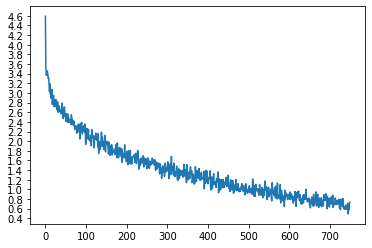

In [ ]:
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 75000, print_every=5000)

You can see that the leftmost loss decreases as the learning progresses. We also show fast learning time on a large number of 75,000 data.

In [ ]:
evaluateRandomly(encoder1, attn_decoder1)

> je suis triste sans vous .
= i m sad without you .
< i m sad without you . <EOS>

> ils sourient .
= they re smiling .
< they re smiling . <EOS>

> je ne suis pas sourd .
= i am not deaf .
< i m not deaf . <EOS>

> vous etes tous satisfaits .
= you re all happy .
< you re all happy . <EOS>

> je ne suis pas fier de moi .
= i m not proud of myself .
< i m not proud of myself . <EOS>

> je suis toujours fatigue .
= i m always tired .
< i m always tired . <EOS>

> je suis aneanti .
= i m devastated .
< i m a . . <EOS>

> c est ma fille .
= she s my daughter .
< she s my daughter . <EOS>

> tu es beau .
= you are beautiful .
< you re beautiful . <EOS>

> je vais changer tout ca .
= i m going to change all that .
< i m going to miss it . <EOS>



[Back to Table of Contents](#0.1)

[Back to fra-eng Table of Contents](#0.2)

#### 8. Visualize the Attention Process <a class="fra-eng" id="16"></a>

A useful property of the attention mechanism is its highly interpretable outputs. Because it is used to weight specific encoder outputs of the input sequence, we can imagine looking where the network is focused most at each time step.

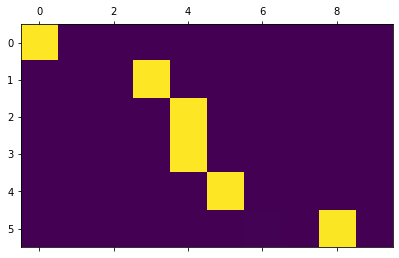

In [ ]:
%matplotlib inline
output_words, attentions = evaluate(
    encoder1, attn_decoder1, "je suis trop froid .")
plt.matshow(attentions.numpy())

For a better viewing experience we will do the extra work of adding axes and labels

input = elle a cinq ans de moins que moi .
output = she is five years younger than i am . <EOS>


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


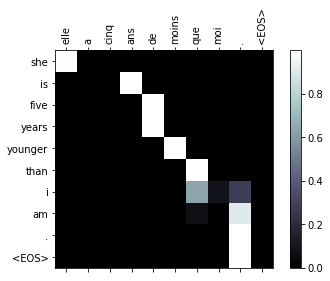

input = elle est trop petit .
output = she is too close . <EOS>


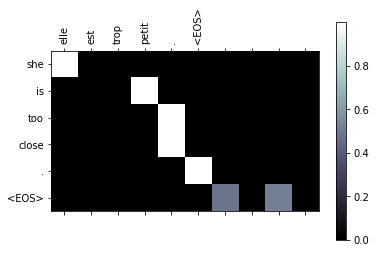

input = je ne crains pas de mourir .
output = i m not scared to die . <EOS>


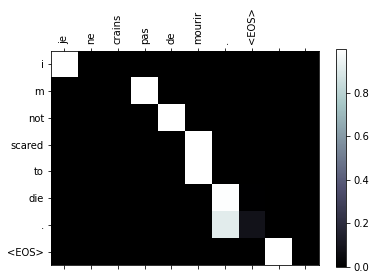

input = c est un jeune directeur plein de talent .
output = he s a talented young lady . <EOS>


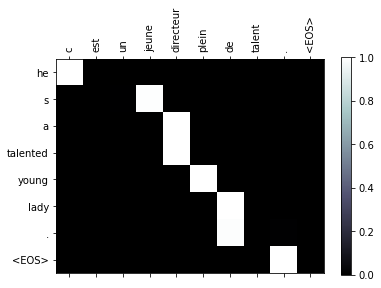

In [ ]:
def showAttention(input_sentence, output_words, attentions):
    # colorbar로 그림 설정
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # 축 설정
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # 매 틱마다 라벨 보여주기
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)


evaluateAndShowAttention("elle a cinq ans de moins que moi .")

evaluateAndShowAttention("elle est trop petit .")

evaluateAndShowAttention("je ne crains pas de mourir .")

evaluateAndShowAttention("c est un jeune directeur plein de talent .")

# 8. Conclusion <a class="anchor" id="17"></a>

Attention Mechanism has been proposed in RNN to prevent deterioration in translation performance due to bottlenecks when sentence length is extended. Recently, self-attention concepts that parallelize them have emerged, and even models that use self-attention to perform better without RNN (Transformer, BERT, etc.) have been pouring out. In order to understand and learn the underlying skills of the latest models, I think it is essential to study Attention Mechanism well.

[Back to Table of Contents](#0.1)

[Back to fra-eng Table of Contents](#0.2)

# 9. References <a class="anchor" id="18"></a>

* NEURAL MACHINE TRANSLATION BY JOINTLY LEARNING TO ALIGN AND TRANSLATE : https://arxiv.org/pdf/1409.0473.pdf

* Attention Mechanism Cleanup Notes : https://wikidocs.net/22893

* Attention Mechanism blog1 : http://blog.naver.com/PostView.nhn?blogId=ckdgus1433&logNo=221608376139

* Attention Mechanism blog2 : https://sy-programmingstudy.tistory.com/14

* Teacher Forcing : https://m.blog.naver.com/PostView.nhn?blogId=sooftware&logNo=221790750668&categoryNo=16&proxyReferer=https:%2F%2Fwww.google.com%2F

* Attention Mechanism YouTube : https://www.youtube.com/watch?v=WsQLdu2JMgI&t=364s

* Attention Mechanism using Tensorflow YouTube : https://www.youtube.com/watch?v=aUsGQaqYYBk&t=3202s

* NLP FROM SCRATCH: TRANSLATION WITH A SEQUENCE TO SEQUENCE NETWORK AND ATTENTION : https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html#nlp-from-scratch-translation-with-a-sequence-to-sequence-network-and-attention

* fra-eng data : https://www.manythings.org/anki/

For more details: https://www.kaggle.com/jeongwonkim10516/attention-mechanism-for-nlp-beginners/log
*italicized text*